# KNN Classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob
import cv2
from fourier_descriptors import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Dataset Creation

In [12]:
input_folder = "data/reference_images/"
label_dict = {"a":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,
             "8":8,"9":9,"10":10,"j":11,"q":12,"k":13}

In [13]:
labels = []
features = []
for img in glob.glob('**/*.png',recursive=True):
    label = img.split("\\")[-1].split("_")[0]
    labels.append(label)
    image = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
    descriptors = extract_features(image,n=5)
    features.append(descriptors)

In [4]:
features = np.asarray(features)
labels = np.asarray(labels)

In [5]:
labels = np.asarray(list(map(lambda l: label_dict[l],labels)))

### Model Creation

In [6]:
knn = KNeighborsClassifier(n_neighbors=3,metric="euclidean")

In [7]:
knn.fit(features,labels)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [8]:
knn.score(features, labels)

0.6550868486352357

### Model Inference

In [12]:
test_image = cv2.imread("data/symbols/10_1.jpg",cv2.IMREAD_GRAYSCALE)
test_descriptors = extract_features(test_image,n=5)
knn.predict_proba(np.asarray(test_descriptors.reshape((1,5))))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [14]:
test_image = cv2.imread("data/symbols/10_2.jpg",cv2.IMREAD_GRAYSCALE)
test_descriptors = extract_features(test_image,n=5)
knn.predict_proba(np.asarray(test_descriptors.reshape((1,5))))

array([[0.        , 0.33333333, 0.        , 0.        , 0.        ,
        0.66666667, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [10]:
test_image = cv2.imread("data/symbols/8_1.jpg",cv2.IMREAD_GRAYSCALE)
test_descriptors = extract_features(test_image,n=5)
knn.predict_proba(np.asarray(test_descriptors.reshape((1,5))))

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.66666667, 0.        , 0.        ,
        0.        , 0.        , 0.33333333]])

In [16]:
test_image = cv2.imread("data/symbols/3_1.jpg",cv2.IMREAD_GRAYSCALE)
test_descriptors = extract_features(test_image,n=5)
knn.predict_proba(np.asarray(test_descriptors.reshape((1,5))))

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.66666667, 0.33333333, 0.        ,
        0.        , 0.        , 0.        ]])

In [18]:
test_image = cv2.imread("data/symbols/3_2.jpg",cv2.IMREAD_GRAYSCALE)
test_descriptors = extract_features(test_image,n=5)
knn.predict_proba(np.asarray(test_descriptors.reshape((1,5))))

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Features visualization

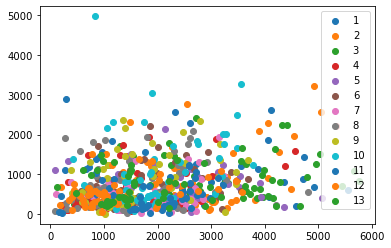

In [10]:
fig,ax = plt.subplots()
for i in range(1,14):
    idx = np.where(labels == i)
    x = features[idx][:,0]
    y = features[idx][:,4]
    ax.scatter(x,y,label=str(i))
ax.legend()

In [ ]:
fig,ax = plt.subplots()
for i in range(1,14):
    idx = np.where(labels == i)
    x = features[idx][:,0]
    y = features[idx][:,4]
    ax.scatter(x,y,label=str(i))
ax.legend()